In [1]:
# Uncomment and run if you do not have these packages installed or are outdated
#!pip install kemlglearn --upgrade
#!pip install scikit-learn --upgrade
#!pip install yellowbrick --upgrade

# Clustering Validation

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from kemlglearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_mutual_info_score, silhouette_score
from kemlglearn.metrics import  scatter_matrices_scores, calinski_harabasz_score, davies_bouldin_score
from sklearn.datasets import make_moons
from sklearn.manifold import Isomap
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import numpy as np
from yellowbrick.cluster import SilhouetteVisualizer
# import matplotlib.style
# import matplotlib as mpl
# mpl.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')


/home/bejar/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.cluster.supervised module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics.cluster. Anything that cannot be imported from sklearn.metrics.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/bejar/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


We will play with data blobs with different characteristics

<IPython.core.display.Javascript object>


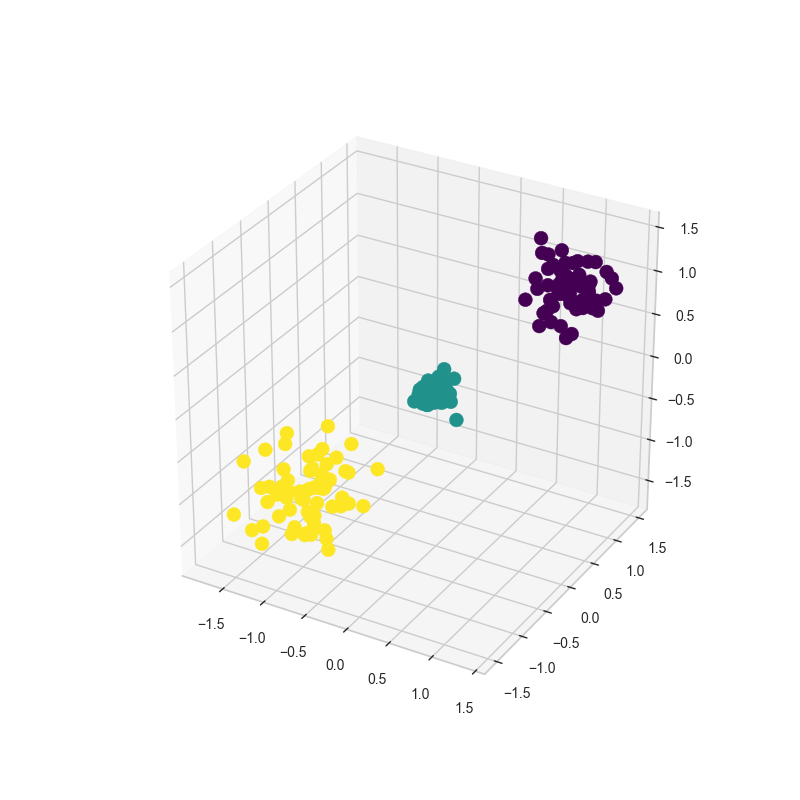

In [3]:
blobs, blabels = make_blobs(n_samples=200, n_features=3, centers=[[1,1,1],[0,0,0],[-1,-1,-1]], cluster_std=[0.2,0.1,0.3])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.set_cmap('viridis')
plt.scatter(blobs[:, 0], blobs[:, 1], zs=blobs[:, 2], depthshade=False, c=blabels, s=100);

These are very well separated blobs very easy to discover using k-means

In [4]:
km = KMeans(n_clusters=3, n_init=10, random_state=0)
labels = km.fit_predict(blobs)
print("AMI=", adjusted_mutual_info_score(blabels, labels))

AMI= 1.0


<IPython.core.display.Javascript object>


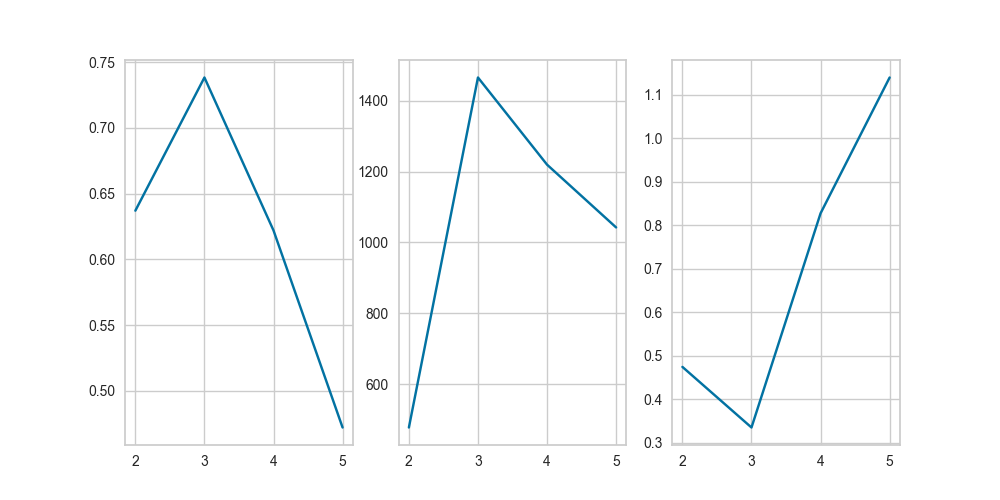

In [5]:
lscores = []
nclusters = 5
for nc in range(2,nclusters+1):
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(blobs)
    lscores.append((
        silhouette_score(blobs, labels),
        calinski_harabasz_score(blobs, labels),
        davies_bouldin_score(blobs, labels)))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(131)
plt.plot(range(2,nclusters+1), [x for x,_,_ in lscores])
ax = fig.add_subplot(132)
plt.plot(range(2,nclusters+1), [x for _, x,_ in lscores])
ax = fig.add_subplot(133)
plt.plot(range(2,nclusters+1), [x for _, _, x in lscores]);

The Silhouette (higher), CH (higher) and DB (lower) indices aggree on that there are three clusters on the data.

The Silhouette index can be visualized for each example to have a better idea of how they fit the clusters for the number whe have picked

<IPython.core.display.Javascript object>


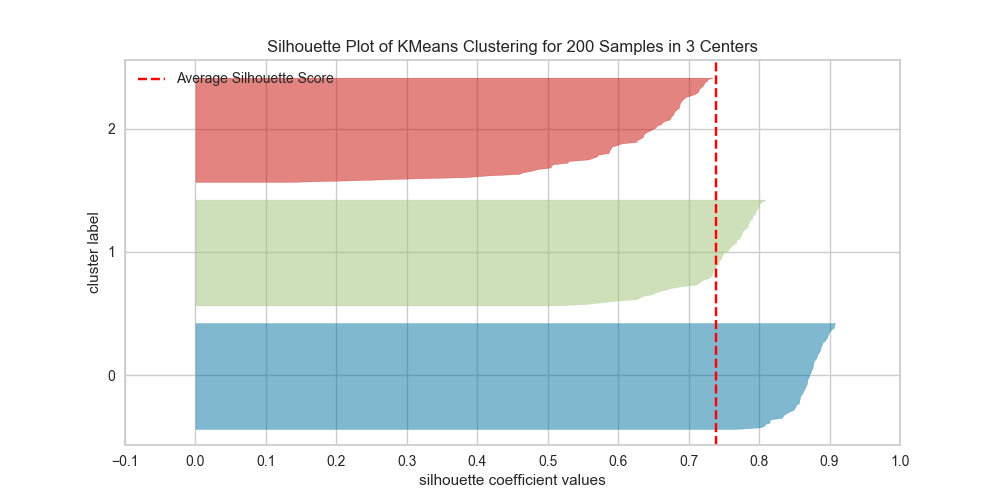

In [6]:
km = KMeans(n_clusters=3, n_init=10, random_state=0)

fig = plt.figure(figsize=(10,5))
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(blobs)        # Fit the data to the visualizer
visualizer.show()   

We can compate this with the wrong number of clusters to see how different plot we get with two and four clusters

<IPython.core.display.Javascript object>


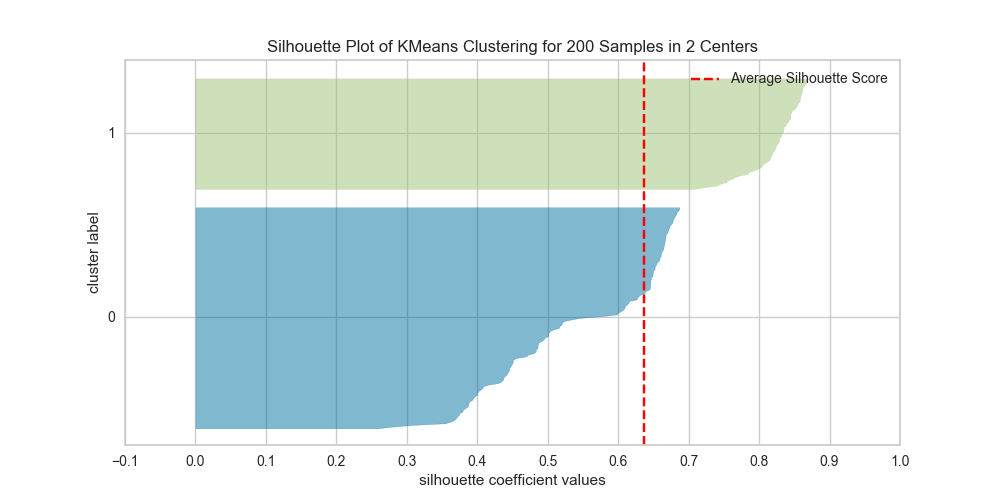

<IPython.core.display.Javascript object>


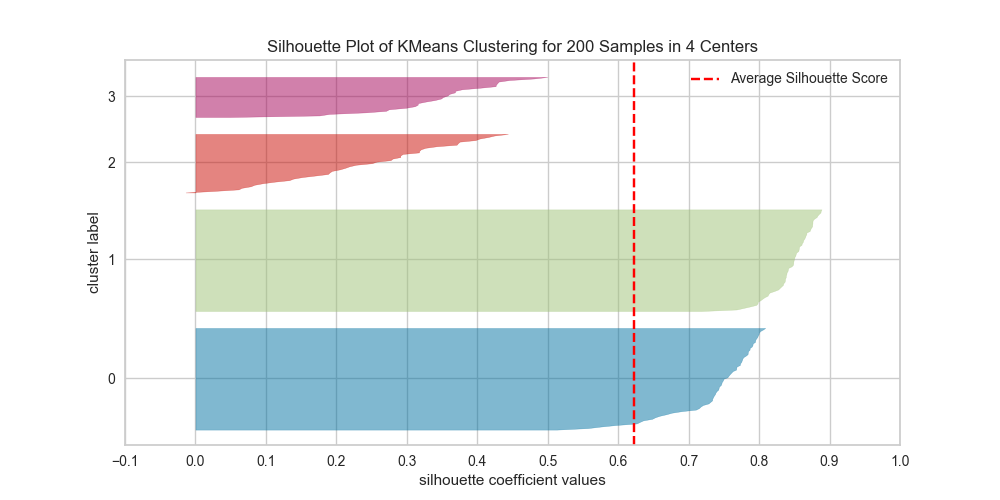

In [7]:
km = KMeans(n_clusters=2, n_init=10, random_state=0)

fig = plt.figure(figsize=(10,5))
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(blobs)        # Fit the data to the visualizer
visualizer.show()  
km = KMeans(n_clusters=4, n_init=10, random_state=0)

fig = plt.figure(figsize=(10,5))
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(blobs)        # Fit the data to the visualizer
visualizer.show()   

Let's introduce some overlapping among the clusters

<IPython.core.display.Javascript object>


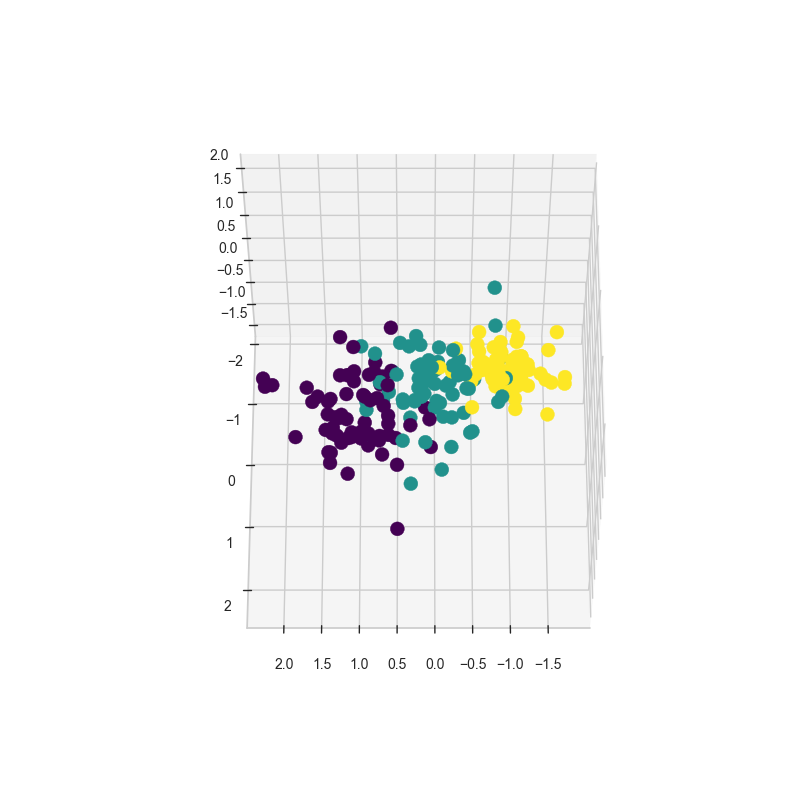

In [8]:
blobs, blabels = make_blobs(n_samples=200, n_features=3, centers=[[1,1,1],[0,0,0],[-1,-1,-1]], cluster_std=[0.4,0.45,0.3])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(60, 90)
plt.scatter(blobs[:, 0], blobs[:, 1], zs=blobs[:, 2], depthshade=False, c=blabels, s=100);

Now is a little bit harder for k-means to discover the clusters

In [9]:
km = KMeans(n_clusters=3, n_init=10, random_state=0)
labels = km.fit_predict(blobs)

print("AMI=",adjusted_mutual_info_score(blabels, labels))

AMI= 0.8368469797141944


<IPython.core.display.Javascript object>


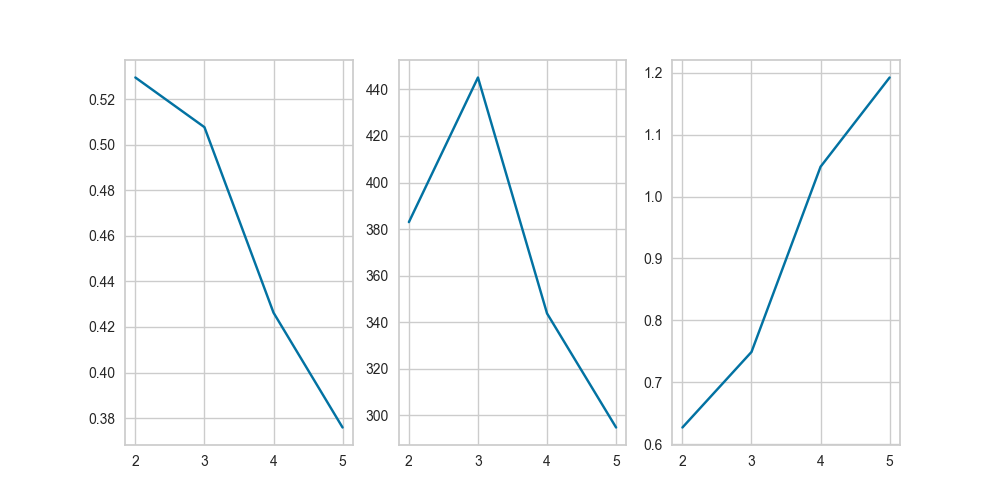

In [10]:
lscores = []
nclusters = 5
for nc in range(2,nclusters+1):
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(blobs)
    lscores.append((
        silhouette_score(blobs, labels),
        calinski_harabasz_score(blobs, labels),
        davies_bouldin_score(blobs, labels)))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(131)
plt.plot(range(2,nclusters+1), [x for x,_,_ in lscores])
ax = fig.add_subplot(132)
plt.plot(range(2,nclusters+1), [x for _, x,_ in lscores])
ax = fig.add_subplot(133)
plt.plot(range(2,nclusters+1), [x for _, _, x in lscores]);

Now only CH index says that there is three clusters on the dataset, Silhouette and DB only see two. 

If we observe the silhouete values for the examples, there are even negative values for some of them

<IPython.core.display.Javascript object>


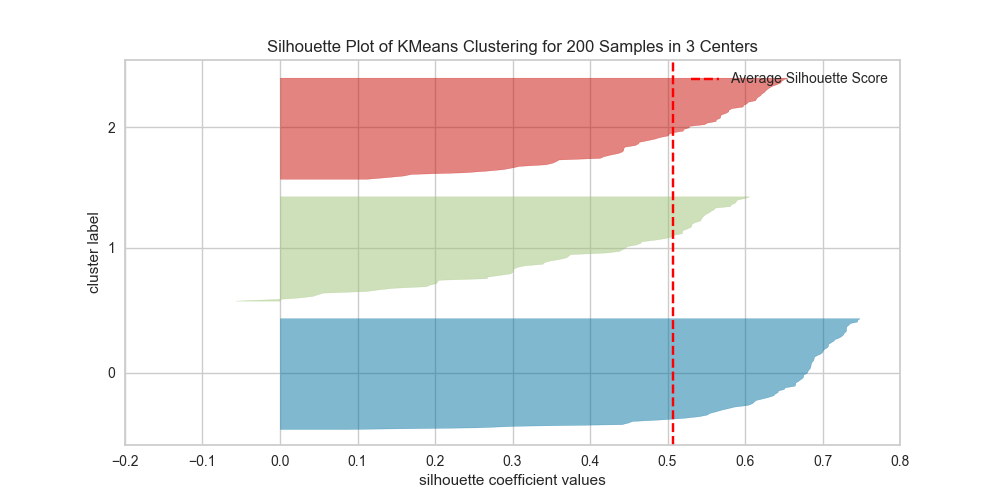

In [11]:
km = KMeans(n_clusters=3, n_init=10, random_state=0)

fig = plt.figure(figsize=(10,5))
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(blobs)        # Fit the data to the visualizer
visualizer.show()   

These are the classical Hartigan index (used fequently for hierarchical clustering) and two other recent published indices.

<IPython.core.display.Javascript object>


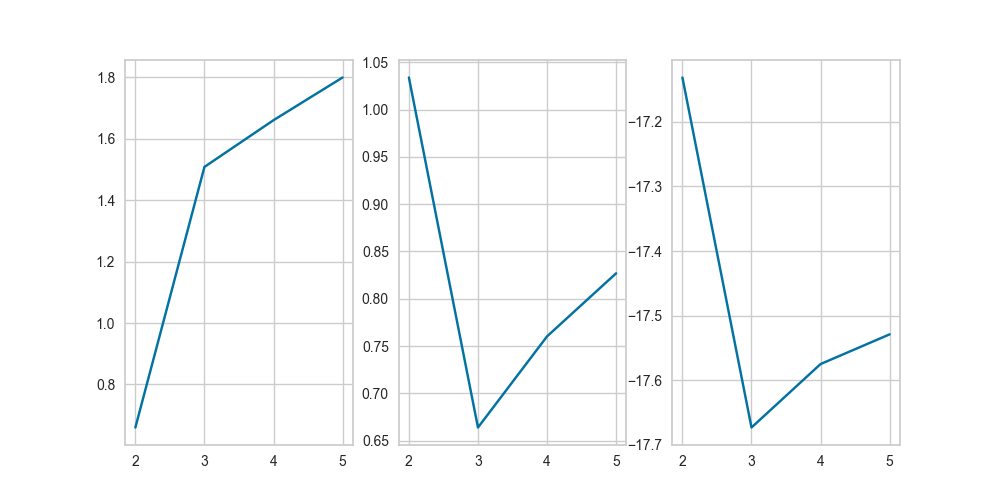

In [12]:
lscores = []
nclusters = 5
for nc in range(2,nclusters+1):
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(blobs)
    lscores.append(scatter_matrices_scores(blobs, labels, indices= ['Hartigan', 'Xu', 'ZCF']))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(131)
plt.plot(range(2,nclusters+1), [x['Hartigan'] for x in lscores])
ax = fig.add_subplot(132)
plt.plot(range(2,nclusters+1), [x['ZCF'] for x in lscores])
ax = fig.add_subplot(133)
plt.plot(range(2,nclusters+1), [x['Xu'] for x in lscores]);

GMM does not have more luck discovering the noisy clusters.

In [13]:
gmm = GaussianMixture(n_components=3, covariance_type='diag', random_state=0)
gmm.fit(blobs)
print("AMI=", adjusted_mutual_info_score(blabels, labels))

AMI= 0.7077858339126858


<IPython.core.display.Javascript object>


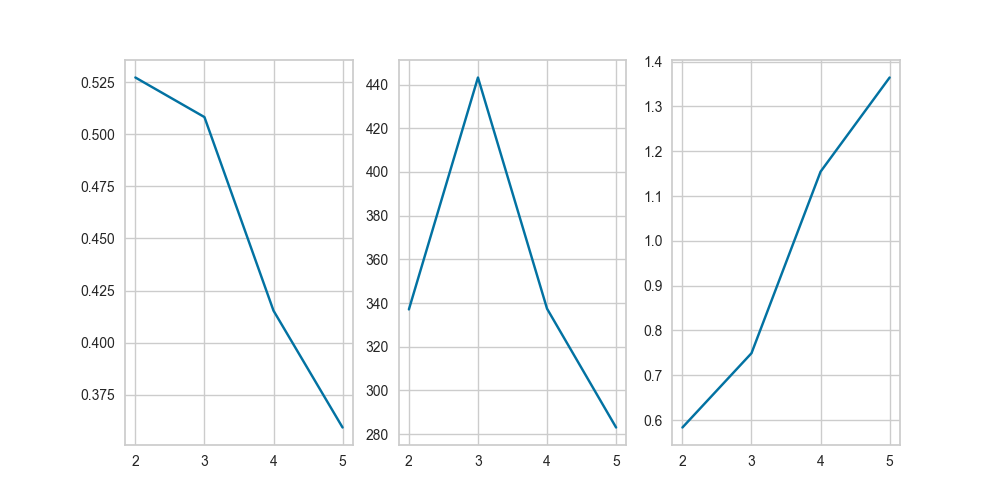

In [14]:
lscores = []
nclusters = 5
for nc in range(2,nclusters+1):
    gmm = GaussianMixture(n_components=nc, covariance_type='diag', random_state=0)
    gmm.fit(blobs)    
    labels = gmm.predict(blobs)
    lscores.append((
        silhouette_score(blobs, labels),
        calinski_harabasz_score(blobs, labels),
        davies_bouldin_score(blobs, labels)))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(131)
plt.plot(range(2,nclusters+1), [x for x,_,_ in lscores])
ax = fig.add_subplot(132)
plt.plot(range(2,nclusters+1), [x for _, x,_ in lscores])
ax = fig.add_subplot(133)
plt.plot(range(2,nclusters+1), [x for _, _, x in lscores]);

And the indices have similar results

Now for non linear data

<IPython.core.display.Javascript object>


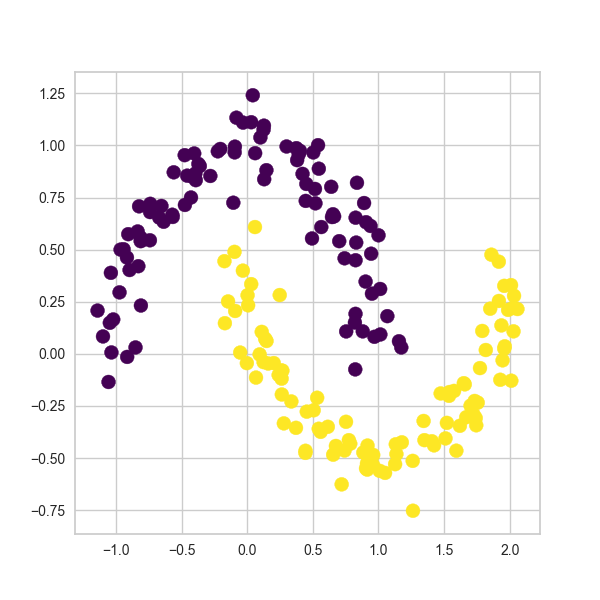

In [15]:
moons, mlabels = make_moons(n_samples=200, noise=0.1)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.scatter(moons[:, 0], moons[:, 1], c=mlabels, s=100);

Obviously the clusters obtained by K-means have little to do with the actual labels

In [16]:
km = KMeans(n_clusters=2, n_init=10, random_state=0)
labels = km.fit_predict(moons)

print("AMI=", adjusted_mutual_info_score(mlabels, labels))

AMI= 0.18588640853379443


<IPython.core.display.Javascript object>


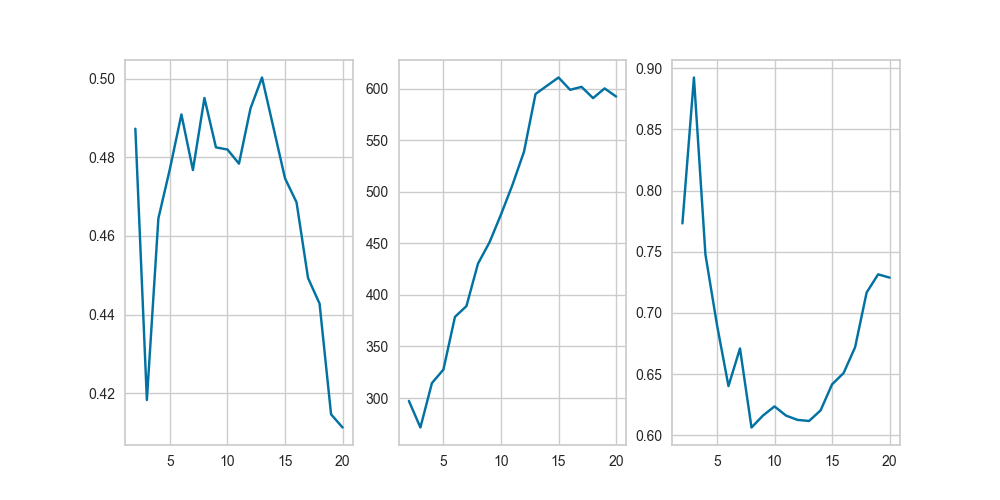

In [17]:
lscores = []
nclusters = 20
for nc in range(2,nclusters+1):
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(moons)
    lscores.append((
        silhouette_score(moons, labels),
        calinski_harabasz_score(moons, labels),
        davies_bouldin_score(moons, labels)))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(131)
plt.plot(range(2,nclusters+1), [x for x,_,_ in lscores])
ax = fig.add_subplot(132)
plt.plot(range(2,nclusters+1), [x for _, x,_ in lscores])
ax = fig.add_subplot(133)
plt.plot(range(2,nclusters+1), [x for _, _, x in lscores]);

Now the scores result in a high number of clusters, Silhouette and DB are close to agreeing on (maybe) 8 clusters, for CH the more the better (12-13?)

<IPython.core.display.Javascript object>


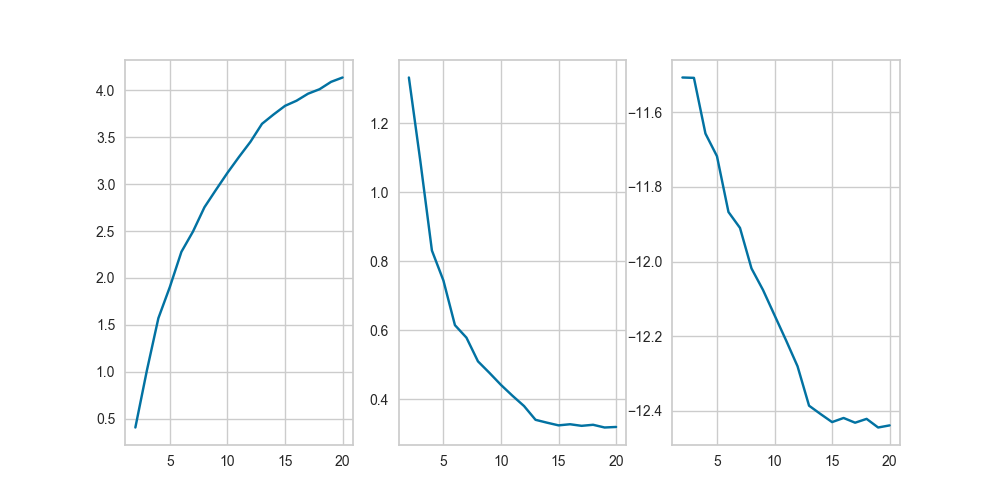

In [18]:
lscores = []
nclusters = 20
for nc in range(2,nclusters+1):
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(moons)
    lscores.append(scatter_matrices_scores(moons, labels, indices= ['Hartigan', 'Xu', 'ZCF']))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(131)
plt.plot(range(2,nclusters+1), [x['Hartigan'] for x in lscores])
ax = fig.add_subplot(132)
plt.plot(range(2,nclusters+1), [x['ZCF'] for x in lscores])
ax = fig.add_subplot(133)
plt.plot(range(2,nclusters+1), [x['Xu'] for x in lscores]);

The other indices also agree on the more the better

We can apply a non linear transformation to the data

In [19]:
iso = Isomap(n_components=2, n_neighbors=7)
fdata = iso.fit_transform(moons)

km = KMeans(n_clusters=2, n_init=10, random_state=0)
labels = km.fit_predict(fdata)

print("AMI=", adjusted_mutual_info_score(mlabels, labels))

AMI= 0.3042849164451113


<IPython.core.display.Javascript object>


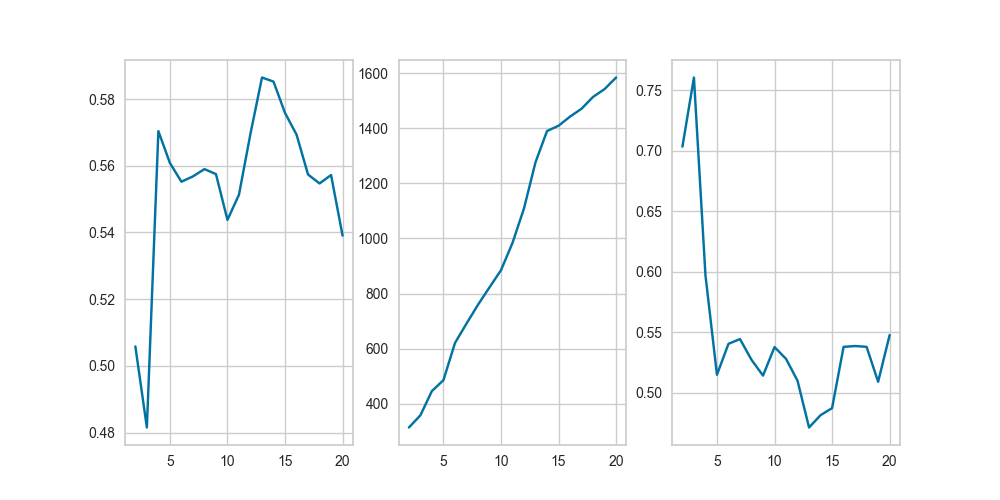

In [20]:
lscores = []
nclusters = 20
for nc in range(2,nclusters+1):
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(fdata)
    lscores.append((
        silhouette_score(fdata, labels),
        calinski_harabasz_score(fdata, labels),
        davies_bouldin_score(fdata, labels)))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(131)
plt.plot(range(2,nclusters+1), [x for x,_,_ in lscores])
ax = fig.add_subplot(132)
plt.plot(range(2,nclusters+1), [x for _, x,_ in lscores])
ax = fig.add_subplot(133)
plt.plot(range(2,nclusters+1), [x for _, _, x in lscores]);

But results are not much better

<IPython.core.display.Javascript object>


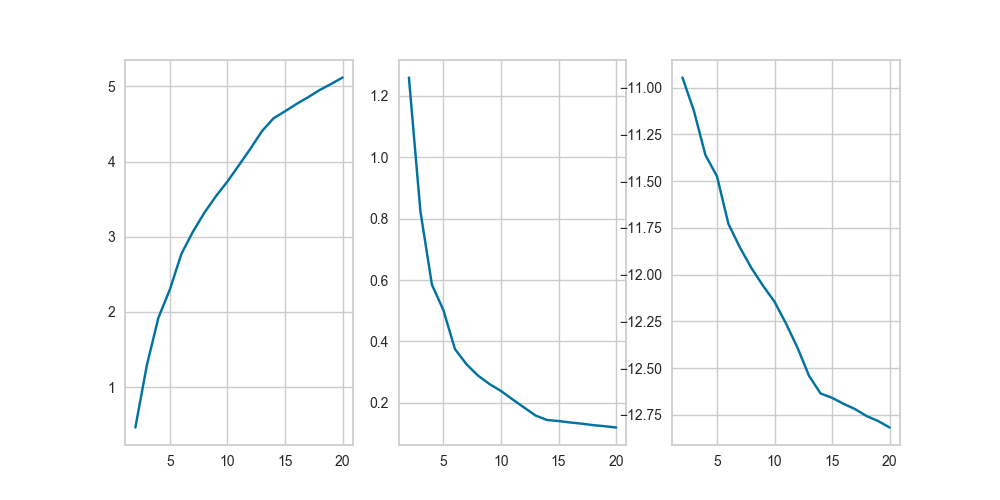

In [21]:
lscores = []
nclusters = 20
for nc in range(2,nclusters+1):
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(fdata)
    lscores.append(scatter_matrices_scores(fdata, labels, indices= ['Hartigan', 'Xu', 'ZCF']))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(131)
plt.plot(range(2,nclusters+1), [x['Hartigan'] for x in lscores])
ax = fig.add_subplot(132)
plt.plot(range(2,nclusters+1), [x['ZCF'] for x in lscores])
ax = fig.add_subplot(133)
plt.plot(range(2,nclusters+1), [x['Xu'] for x in lscores]);

For any of the indices

# External Indices

Another approach to cluster validation is to use external indices, this assumes that we know the labels and we compute how
"correlated" are to the ones discovered.

<IPython.core.display.Javascript object>


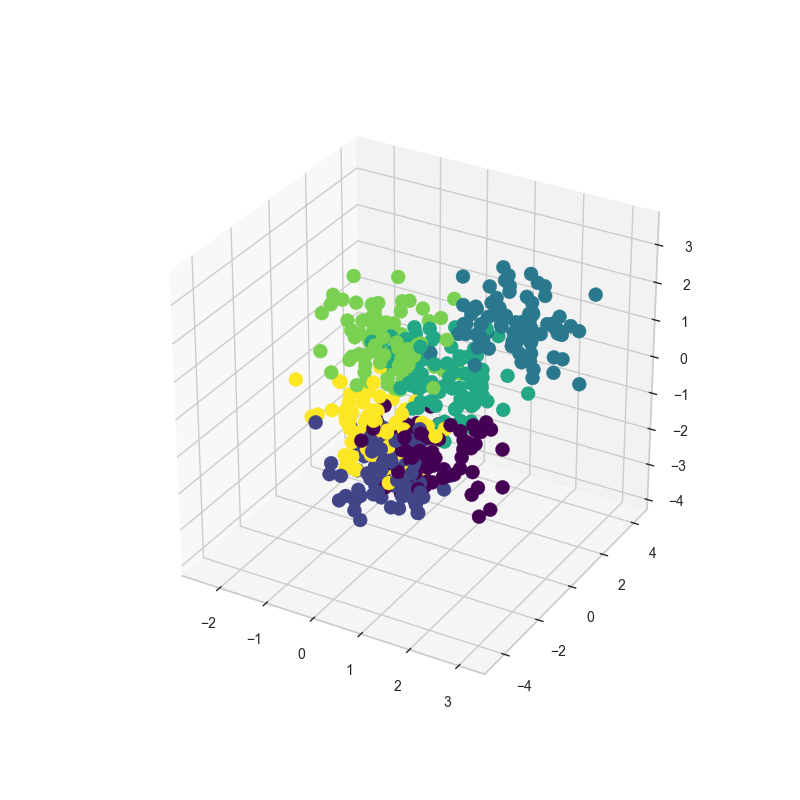

In [22]:
blobs, blabels = make_blobs(n_samples=500, n_features=10, centers=6, cluster_std=.6, center_box=(-3,3))
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(blobs[:, 0], blobs[:, 1], zs=blobs[:, 2], depthshade=False, c=blabels, s=100);

<IPython.core.display.Javascript object>


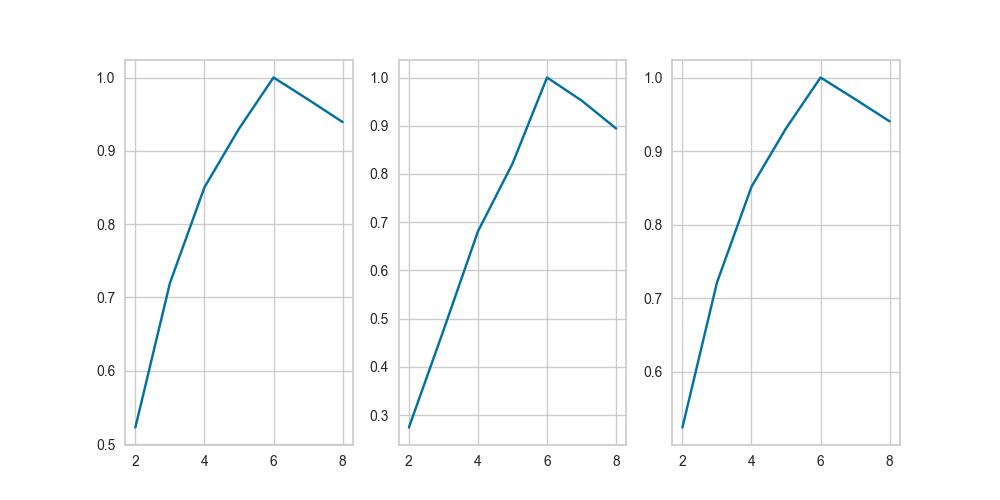

In [23]:
lscores = []
nclusters = 8
for nc in range(2,nclusters+1):
    km = KMeans(n_clusters=nc, n_init=10, random_state=0)
    labels = km.fit_predict(blobs)
    lscores.append((
        adjusted_mutual_info_score(blabels, labels),
        adjusted_rand_score(blabels, labels),
        normalized_mutual_info_score(blabels, labels)))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(131)
plt.plot(range(2,nclusters+1), [x for x,_,_ in lscores])
ax = fig.add_subplot(132)
plt.plot(range(2,nclusters+1), [x for _, x,_ in lscores])
ax = fig.add_subplot(133)
plt.plot(range(2,nclusters+1), [x for _, _, x in lscores]);

In this case the maximum value of the scores is at the correct number of clusters

We do not always have a set of labels to compare with, another approach to take advantage of algorithms that return different partitions depending on initialization (e.g. K-means) and test how close are the labelings, the correct number of clusters should be where the different clusters have higher agreement.

<IPython.core.display.Javascript object>


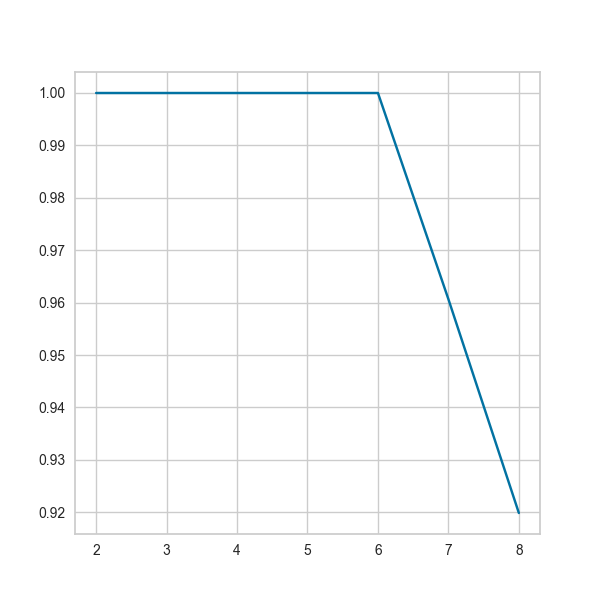

In [24]:
lscores = []
nclusters = 8
for nc in range(2,nclusters+1):
    llabels = []
    for i in range(10):
        km = KMeans(n_clusters=nc, n_init=10)
        labels = km.fit_predict(blobs)
        llabels.append(labels)
    mscores = []
    for i in range(10):
        for j in range(i,10):
            mscores.append(adjusted_mutual_info_score(llabels[i], llabels[j]))
    lscores.append(np.mean(mscores))
            
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.plot(range(2,nclusters+1), lscores);

In this case there is a range of possible clusters with high agreement.